### Student Performance Indicator

#### Life cycle of Machine Learning Project

 * Understanding the Problem Statement
 * Data Collection
 * Data Checks to perform
 * Exploratory data analysis
 * Data Pre-Processing
 * Model Training
 * Choose best model
 
### 1) Problem statement  
 * This project understands how the student's performance
   (test scores) is affected by other variables such as Gender, Ethnicity,Parental level of education, Lunch and Test preparation course

### 2) Data collection
  * Dataset source - 
   https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
  * The data consists of 8 column and 1000 rows

  #### 2.1 Import Data and Required packages    


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Importing the csv file as Pandas dataframe

In [3]:
df = pd.read_csv('data/stud.csv')

Showing top 5 records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [5]:
df.shape

(1000, 8)

#### 2.2 Dataset information

  * gender: sex of students ->(Male/female)
  * race/ethnicity: ethnicity of students -> (Group A,B,C,D,E)
  * Parental level of education: parents' final education ->
    (bachelor's degree,some college,master's degree,associate's degree
    high school)
  * lunch: having lunch before test(standard or free/reduced)
  * test preparation course: complete or not complete before test
  * math score
  * reading score
  * writing score

### 3. Data Checks to perform
  * Check missing values
  * Check duplicates
  * Check data type
  * Check the number of unique of each column 
  * Check statistics of data set
  * Check various categories present in the different categorical column


#### 3.1 Check missing values

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

 #### 3.2 Check duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

##### There are no duplicated values in the dataset

#### 3.3 Check data types

In [8]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

#### 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check statistics of data set

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insight
  * From above description of numerical data,all means are 
    very close to each other- between 66.08 and 68.05
  * All standard deviations are also close between 14.6 and 15.19
  * While there is a minimum score of 0 for math, for writing 
    minimum is much higher = 10 and for reading is higher 
    compared to the rest with 17  

#### 3.7 Exploring data

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Categories in gender variable:  ",df['gender'].unique())

print("Categories in race ethnicity variable:  ",df['race_ethnicity'].unique())

print("Categories in lunch variable:  ",df['lunch'].unique())

print("Categories in test preparation course variable:  ",df['test_preparation_course'].unique())


Categories in gender variable:   ['female' 'male']
Categories in race ethnicity variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in lunch variable:   ['standard' 'free/reduced']
Categories in test preparation course variable:   ['none' 'completed']


In [13]:
# define numerical & categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns 

print('We have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


#### 3.8 Adding columns for  Total Score and Average

In [15]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
math_full = df[df['math_score'] == 100]['Average'].count()
reading_full = df[df['reading_score'] ==100]['Average'].count()
writing_full = df[df['writing_score'] == 100]['Average'].count()

print(f'Number of students with full marks un maths: {math_full}')
print(f'Number of students with full marks in reading: {reading_full}')
print(f'Number of students with full marks in writing: {writing_full}')

Number of students with full marks un maths: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [17]:
math_less = df[df['math_score'] < 40]['Average'].count()
reading_less = df[df['reading_score'] < 40]['Average'].count()
writing_less = df[df['writing_score'] < 40]['Average'].count()

print(f'Number of students with less than 40 marks in Maths: {math_less}')
print(f'Number of students with less than 40 marks in reading: {reading_less}')
print(f'Number of students with less than 40 marks in writing: {writing_less}')

Number of students with less than 40 marks in Maths: 40
Number of students with less than 40 marks in reading: 26
Number of students with less than 40 marks in writing: 32


#### Insights
  * From above values we get students have perfomed the  worst in Maths 
  * Best performance is in reading section



### 4. Exploring Data (Visualization)
#### 4.1 Visualize average score distribution to make some conclusion
 * Histogram
 * Kernel Distribution Function (KDE)

##### 4.1.1 Histogram & KDE

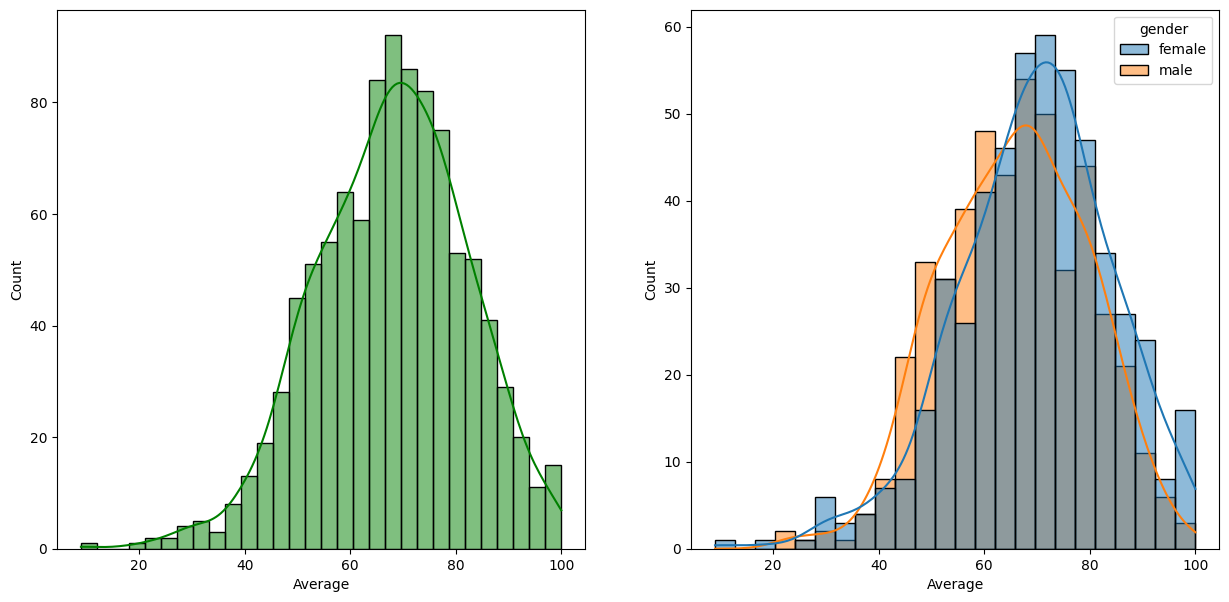

In [18]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'Average', bins = 30, kde = True, color = 'g' )
plt.subplot(122)
sns.histplot(data = df, x = 'Average', kde = True, hue = 'gender')
plt.show()

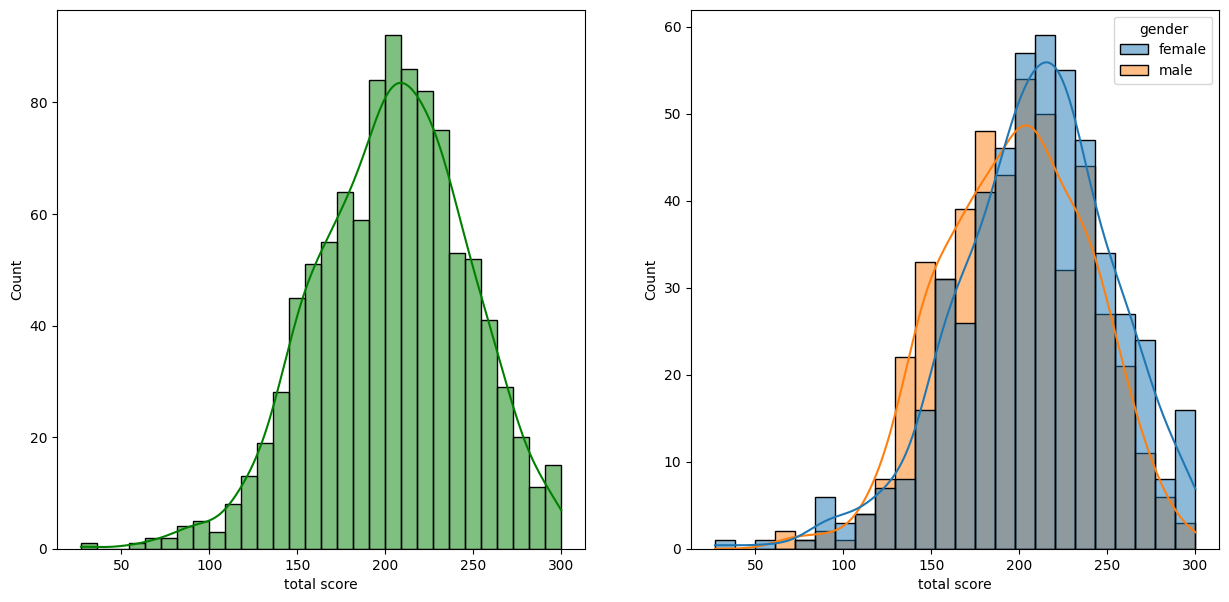

In [19]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'total score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'total score', kde = True, hue = 'gender')
plt.show()

##### Insights
  * Female students tend to perform better than males

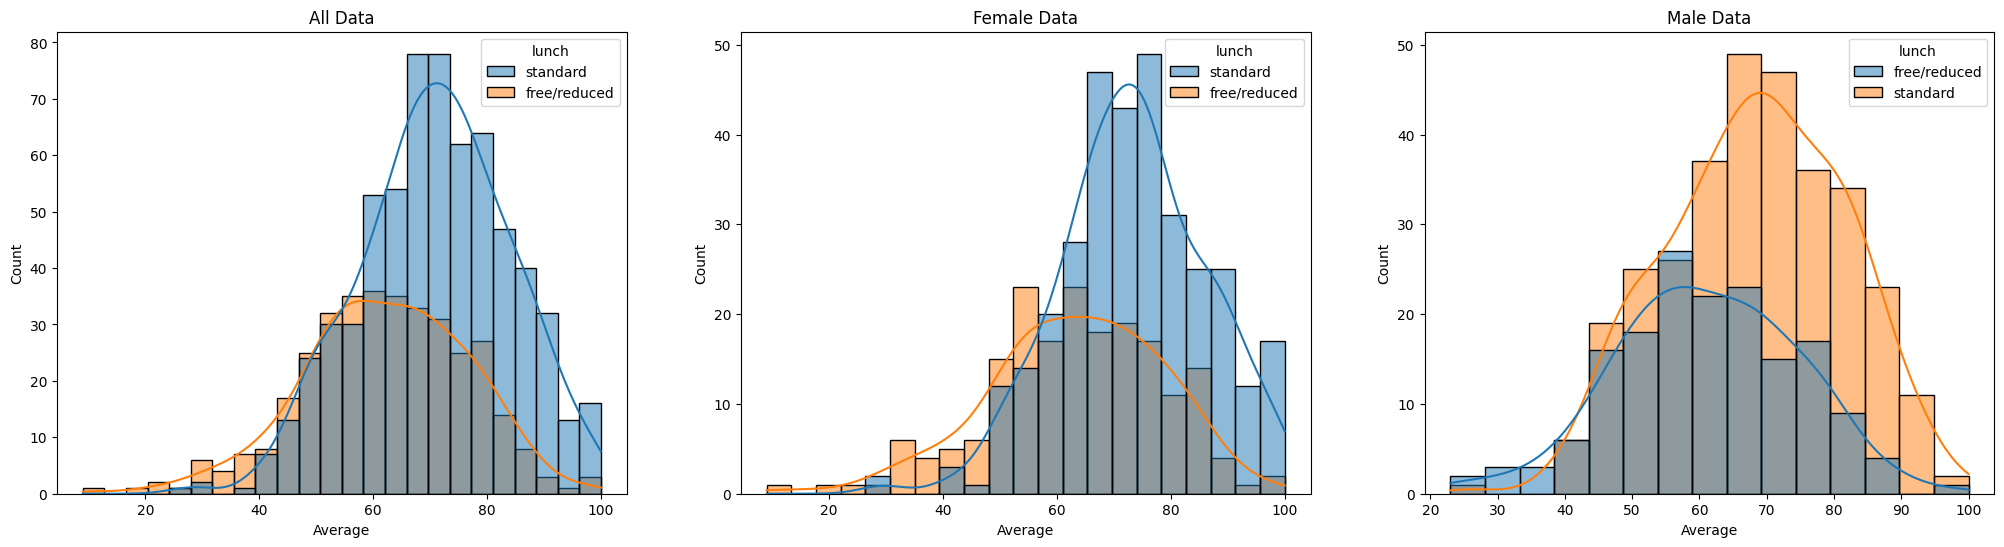

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# First subplot
sns.histplot(data=df, x='Average', kde=True, hue='lunch', ax=axs[0])
axs[0].set_title('All Data')
axs[0].set_xlabel('Average')
axs[0].set_ylabel('Count')

# Second subplot (female data)
sns.histplot(data=df[df.gender == 'female'], x='Average', kde=True, hue='lunch', ax=axs[1])
axs[1].set_title('Female Data')
axs[1].set_xlabel('Average')

# Third subplot (male data)
sns.histplot(data=df[df.gender == 'male'], x='Average', kde=True, hue='lunch', ax=axs[2])
axs[2].set_title('Male Data')
axs[2].set_xlabel('Average')



plt.show()

#### Insight
 * Standard lunch helps in performance of exam be it be female or male

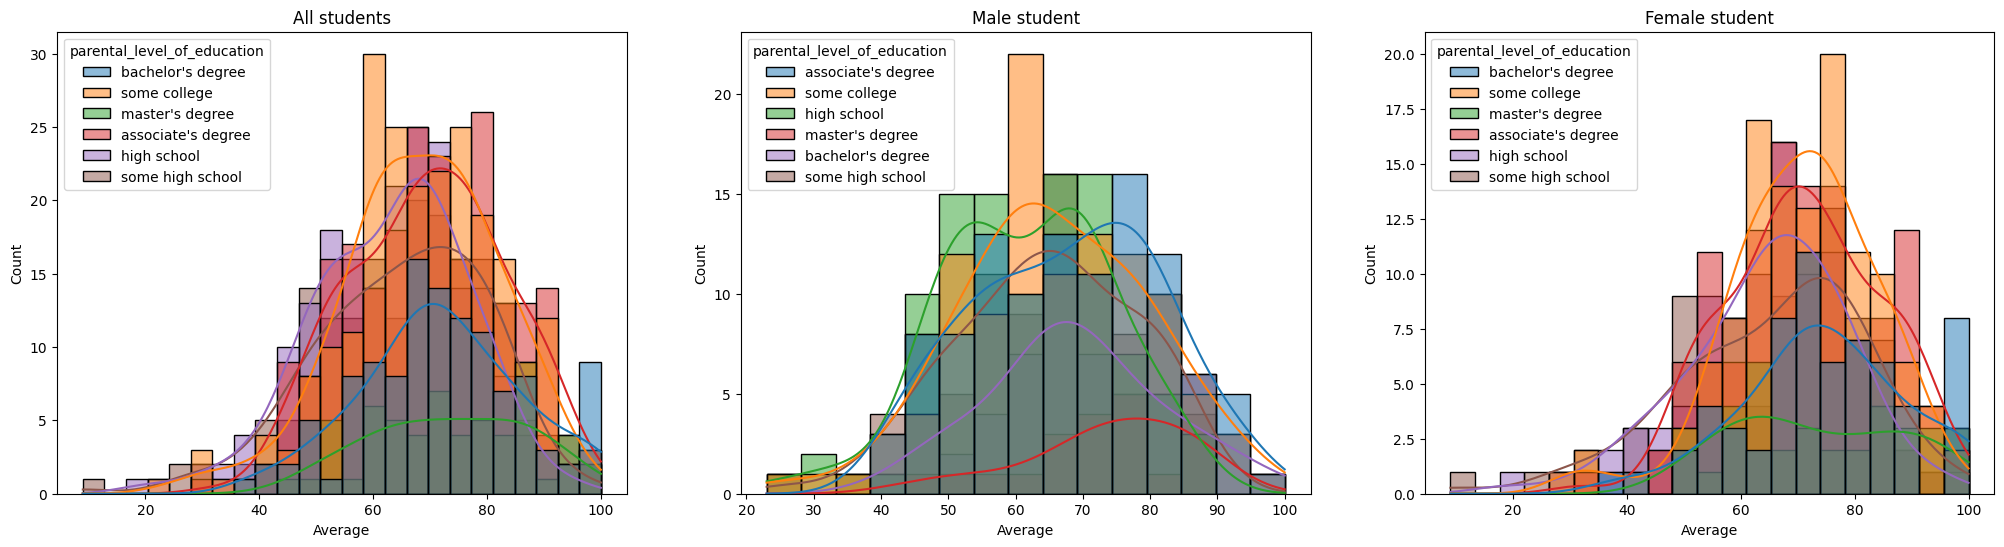

In [21]:
plt.subplots(1, 3, figsize = (25,6))

plt.subplot(131)
ax1 = sns.histplot( data = df, x = 'Average', kde = True, hue = 'parental_level_of_education')
ax1.set_title('All students')

plt.subplot(132)
ax2 =sns.histplot(data=df[df.gender=='male'], x='Average', kde = True, hue = 'parental_level_of_education')
ax2.set_title('Male student')

plt.subplot(133)
ax3 =sns.histplot(data=df[df.gender=='female'], x='Average', kde = True, hue = 'parental_level_of_education')
ax3.set_title('Female student')
plt.show()


#### Insight
  * In general parents education level does not affect students performance
  * Male students parents who have a high school certificate tend to perform better
  * Female students parents who are from some college tend to perform better

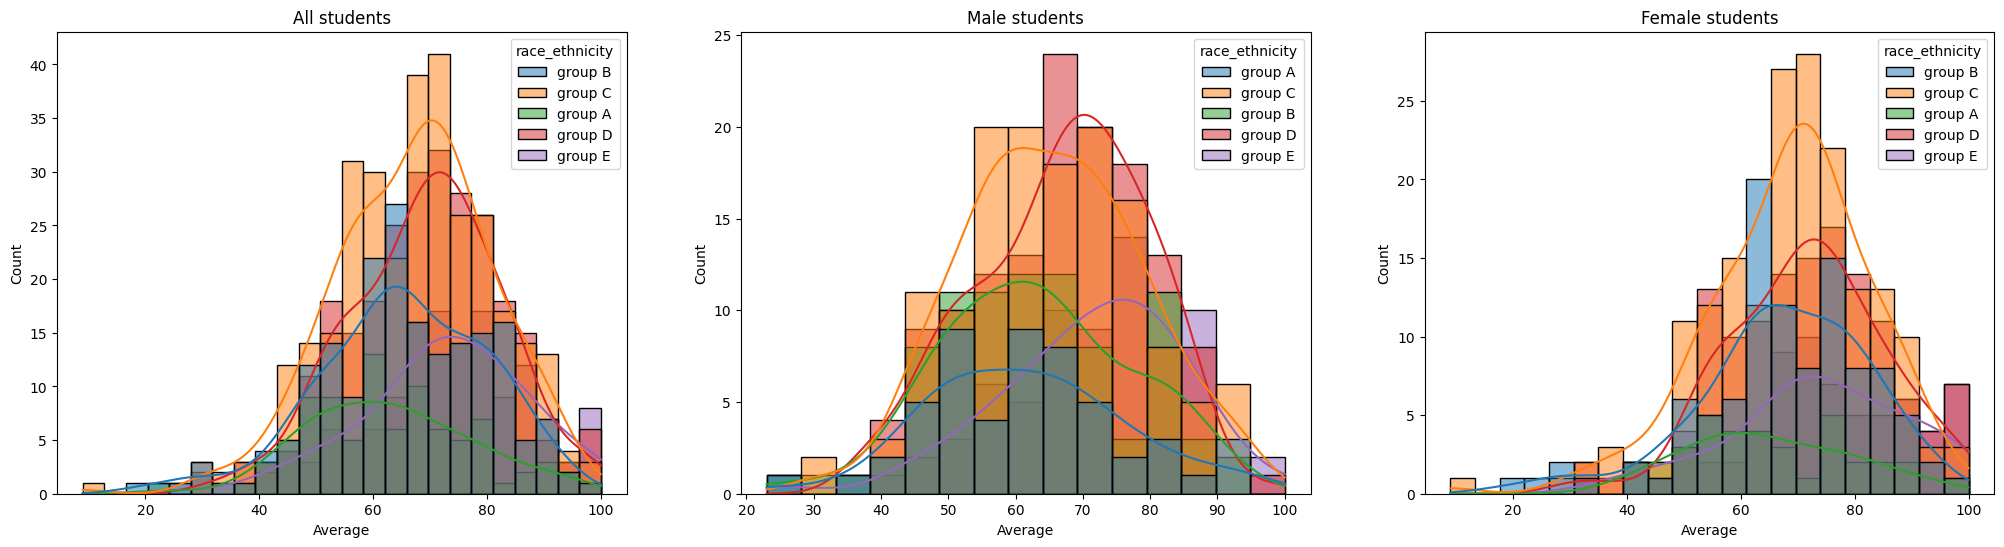

In [22]:
plt.subplots(1, 3, figsize = (25,6))

plt.subplot(131)
ax1 = sns.histplot(data = df, x = 'Average', kde = True, hue = 'race_ethnicity')
ax1.set_title('All students')

plt.subplot(132)
ax2 = sns.histplot(data = df[df.gender == 'male'], x = 'Average', kde = True, hue = 'race_ethnicity')
ax2.set_title('Male students')

plt.subplot(133)
ax3 = sns.histplot(data = df[df.gender == 'female'], x = 'Average', kde = True, hue = 'race_ethnicity')
ax3.set_title('Female students')

plt.show()

#### Insight
  * Students of group C tend to perform the best
  * Male student of group D perform better compared to group C with a lower margin
    

#### 4.2 Maximum score of students in all three subjects

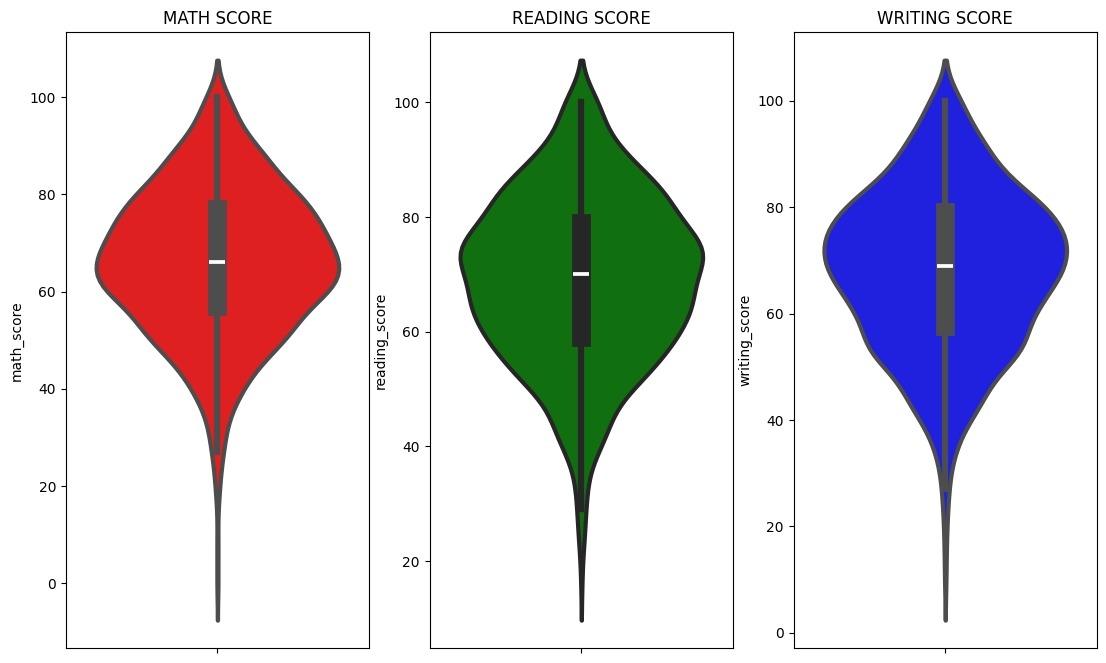

In [23]:
plt.figure(figsize = (18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORE')
sns.violinplot(y = 'math_score', data = df, color = 'red', linewidth = 3)

plt.subplot(1, 4, 2)
plt.title('READING SCORE')
sns.violinplot(y = 'reading_score', data = df, color = 'green', linewidth = 3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORE')
sns.violinplot(y = 'writing_score', data = df, color = 'blue', linewidth = 3)

plt.show()

#### Insight
  * We can clearly see that most student's score lies between 60 and 80 

#### 4.3 Multivariate analysis using pieplot

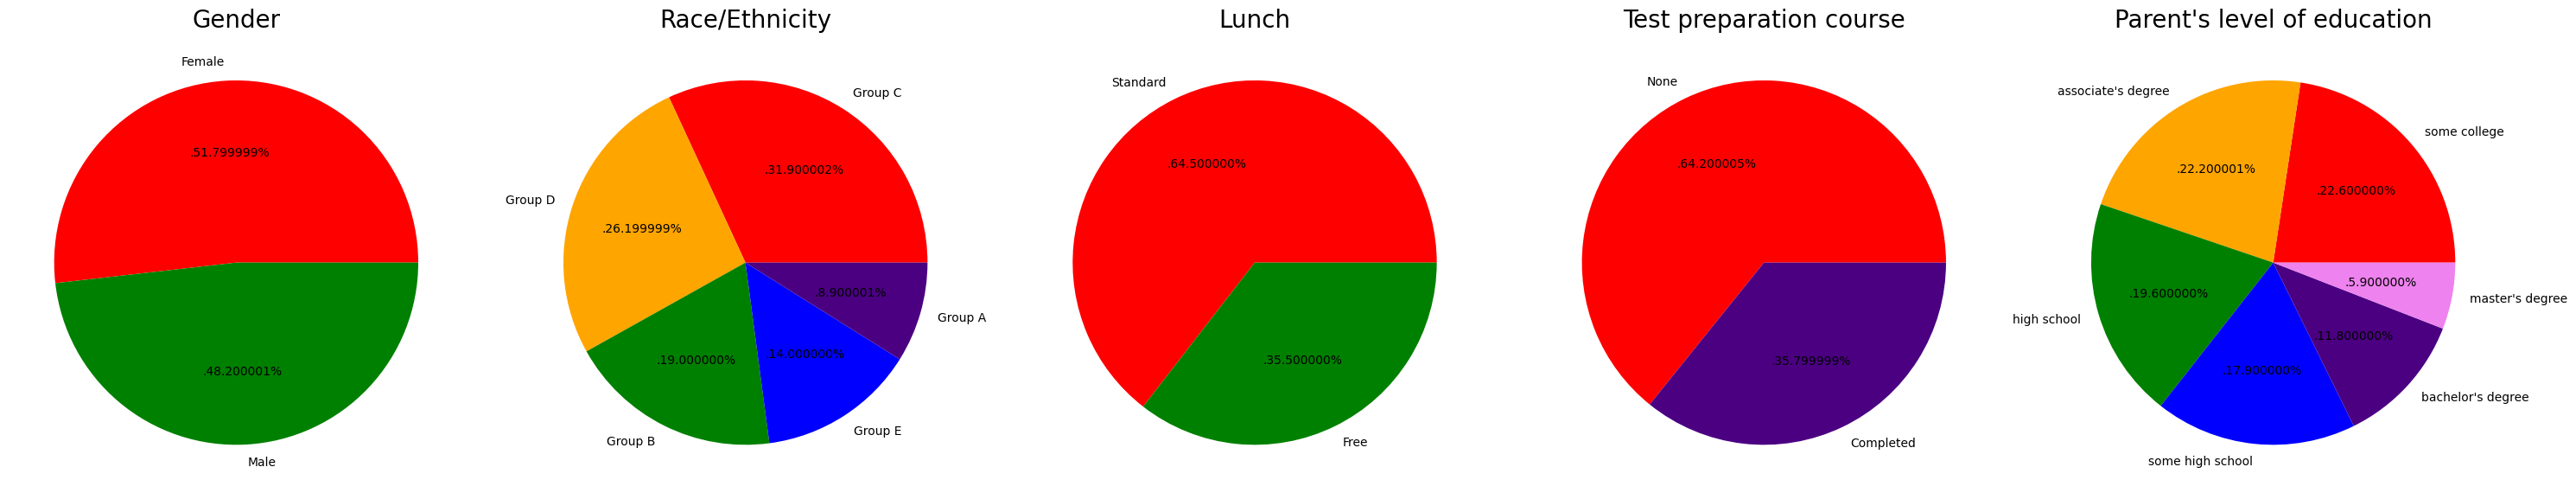

In [24]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']
plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'orange', 'green', 'blue', 'indigo']
plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'indigo']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test preparation course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'some college', "associate's degree", 'high school', 'some high school',"bachelor's degree", "master's degree"
color = ['red', 'orange', 'green', 'blue', 'indigo', 'violet']
plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title("Parent's level of education", fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()


#### Insights
  * Number of female students is more than males
  * Number of students are greatest in Group C
  * Number of student with standard lunch are greatest
  * Number of students who have not enrolled in any test preparation course is greater
  * Number of students whose parental education is "Some college" is greater followed closely by "associate's degree"

#### 4.4 Feature Wise Visualization
##### 4.4.1 GENDER COLUMN
  * How is distribution of Gender ?
  * Is gender has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

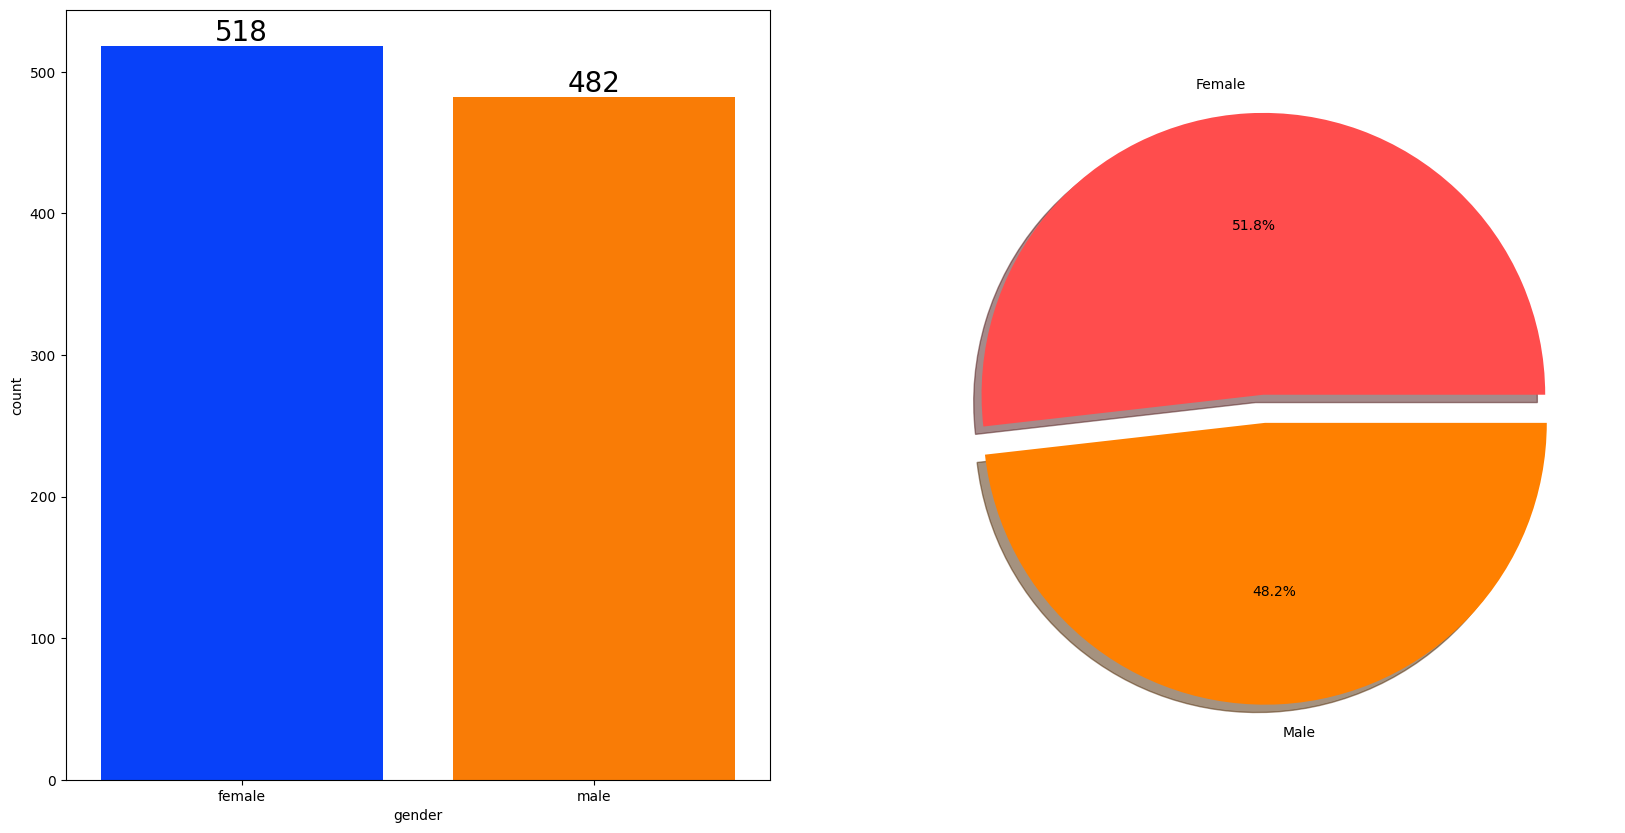

In [25]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.countplot(x = df['gender'], data = df, palette = 'bright', ax = ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color = 'black',size = 20)
    
plt.pie(x = df['gender'].value_counts(), labels = ['Female','Male'], explode=[0, 0.1], autopct = '%1.1f%%', shadow = True, colors = ['#ff4d4d', '#ff8000'])
plt.show()

#### Insight
  * Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

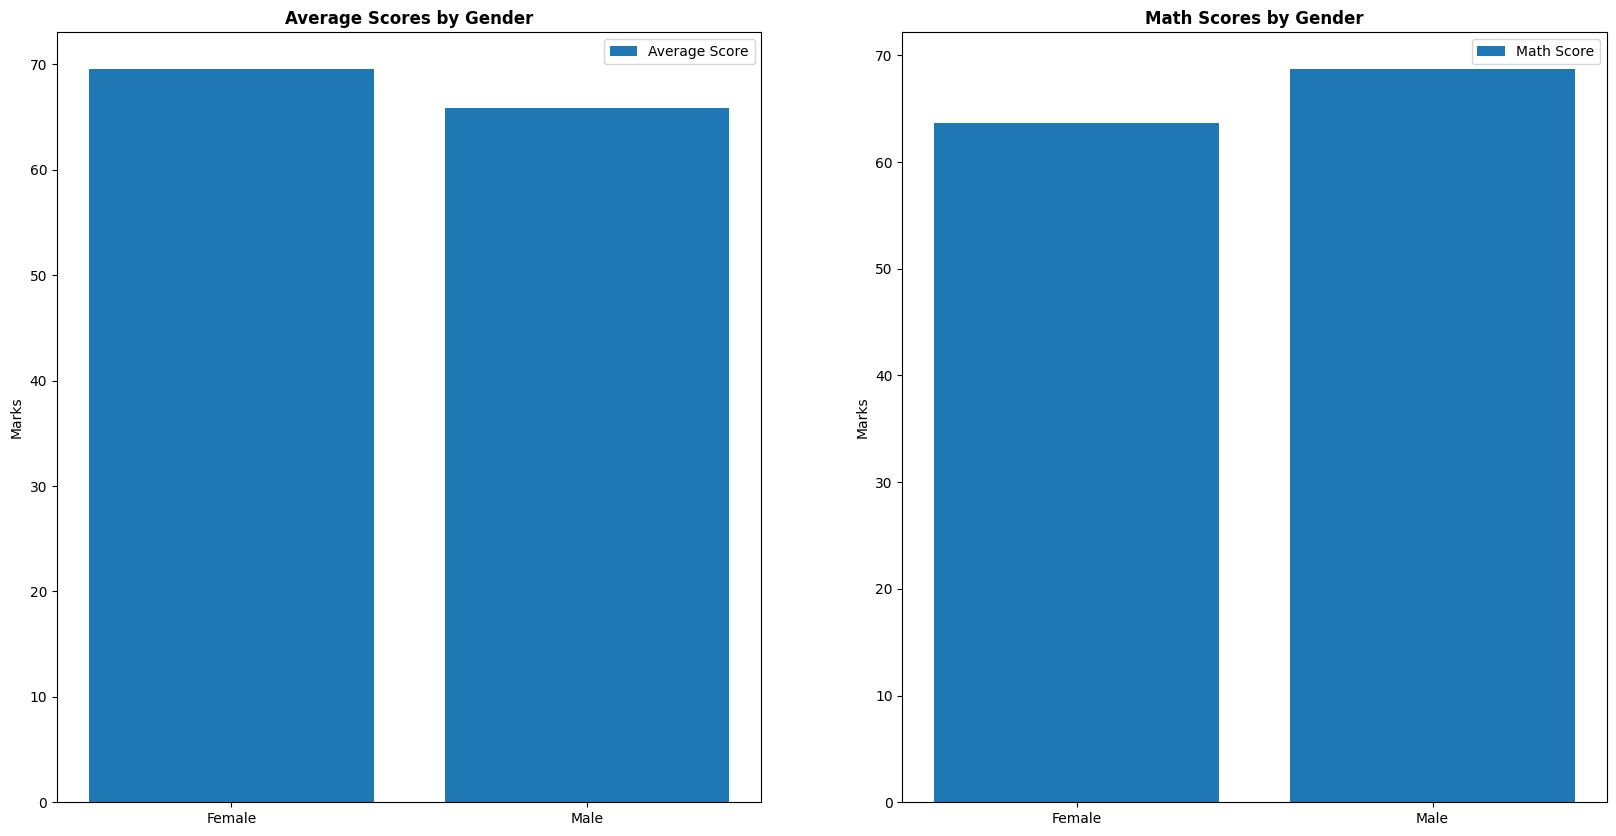

In [26]:
#Average overall marks
female_scores = df[df['gender'] == 'female']['Average'].mean()
male_scores = df[df['gender'] == 'male']['Average'].mean()

#Average math scores
females_scores1  = df[df['gender'] == 'female']['math_score'].mean()
males_scores2 = df[df['gender'] == 'male']['math_score'].mean()

plt.rcParams['figure.figsize'] = (20, 10)

#Plot for overall marks
plt.subplot(1, 2, 1)
plt.bar(['Female', 'Male'], [female_scores, male_scores], label='Average Score')
for container in ax[0].containers:
    ax[0].bar_label(container,color = 'black',size = 20)
plt.ylabel("Marks")
plt.title("Average Scores by Gender", fontweight = 'bold')
plt.legend()

#Plot for math score
plt.subplot(1, 2, 2)
plt.bar(['Female','Male'], [females_scores1, males_scores2], label = 'Math Score')
for container in ax[0].containers:
    ax[0].bar_label(container,color = 'black',size = 20)
plt.ylabel("Marks")
plt.title("Math Scores by Gender", fontweight = 'bold') 
plt.legend()

plt.show()


#### Insight
  * On an average females have a better overall score than men
  * Males score higher in maths

### 4.4.2 RACE/EHNICITY COLUMN
 * How is Group wise distribution ?
 * Is Race/Ehnicity has any impact on student's performance ?
 
### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)  

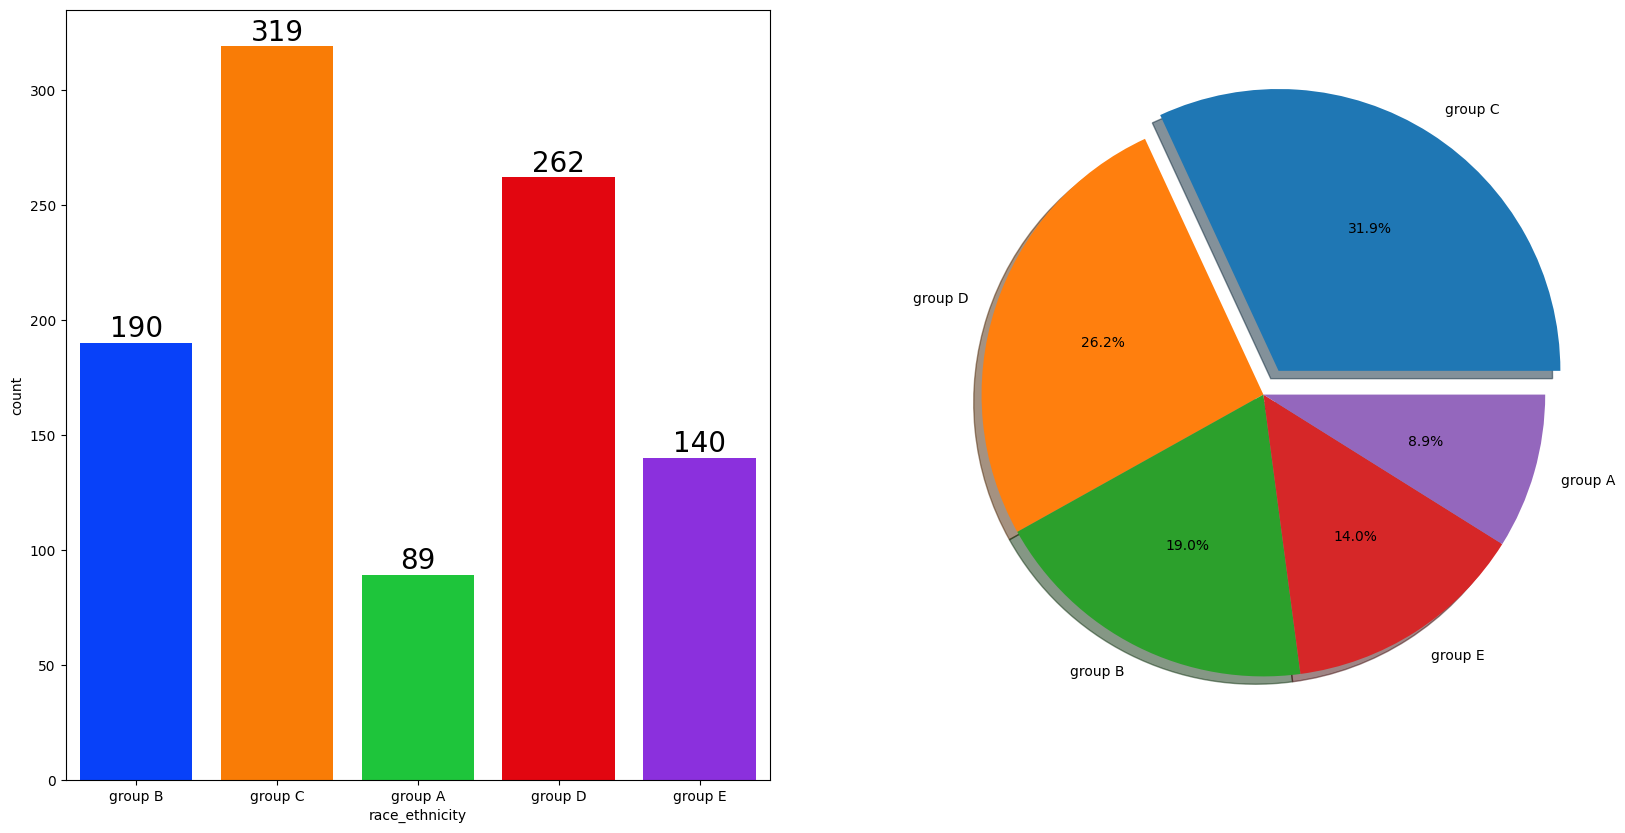

In [27]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))

sns.countplot(x = df['race_ethnicity'],data = df, palette = 'bright',ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black',size = 20)
    
plt.pie(x = df['race_ethnicity'].value_counts(), labels = df['race_ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct = '%1.1f%%', shadow = True)
plt.show()   

#### Insights
  * Most of the student belonging from group C /group D.
  * Lowest number of students belong to group A.

### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

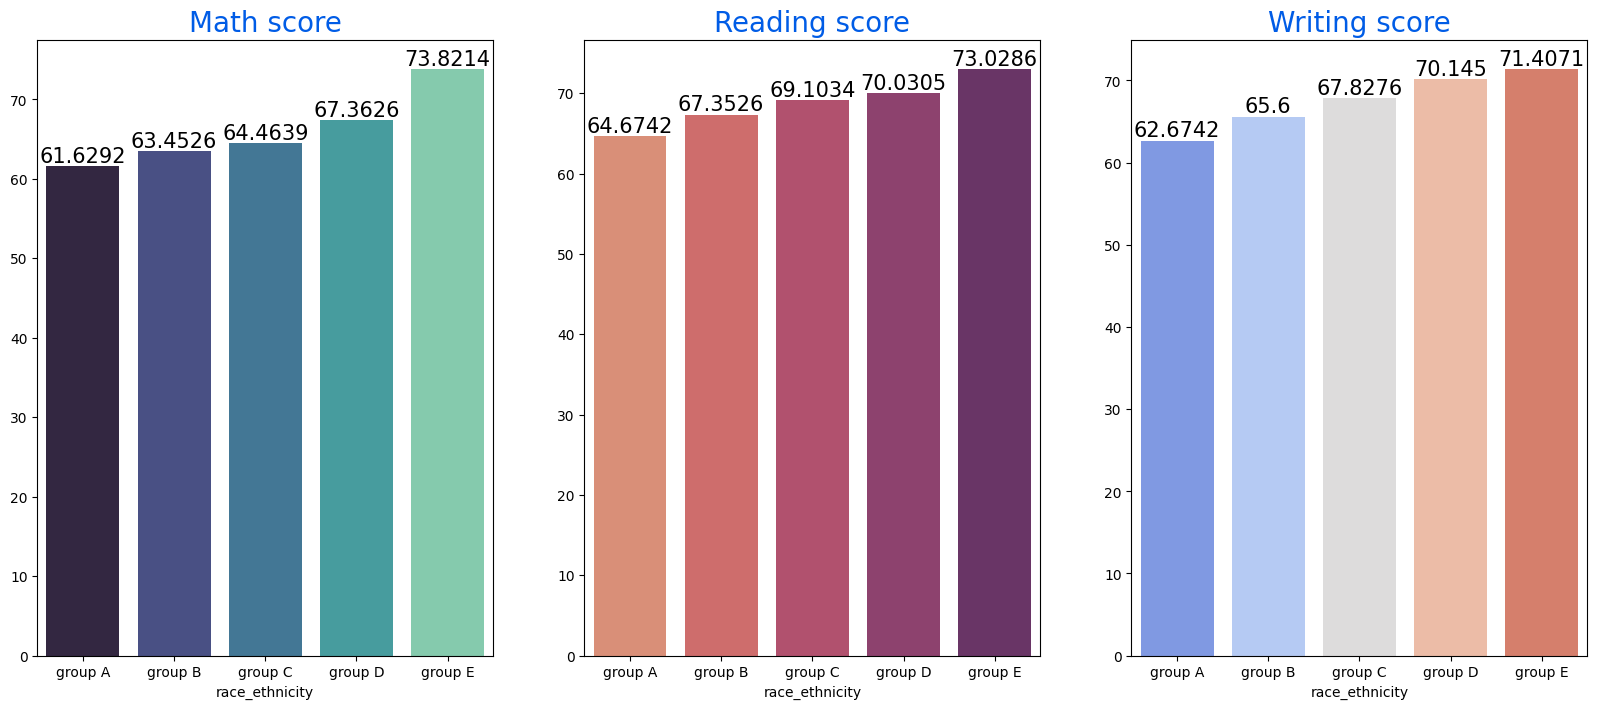

In [28]:
Group_data2 = df.groupby('race_ethnicity')
f, ax = plt.subplots(1, 3, figsize = (20, 8))
sns.barplot(x = Group_data2['math_score'].mean().index, y = Group_data2['math_score'].mean().values, palette = 'mako', ax = ax[0])
ax[0].set_title('Math score', color = '#005ce6', size = 20)

for container in ax[0].containers:
    ax[0].bar_label(container,color = 'black', size = 15)

sns.barplot(x = Group_data2['reading_score'].mean().index, y = Group_data2['reading_score'].mean().values, palette = 'flare', ax=ax[1])
ax[1].set_title('Reading score', color = '#005ce6', size = 20)

for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 15)

sns.barplot(x = Group_data2['writing_score'].mean().index, y = Group_data2['writing_score'].mean().values, palette = 'coolwarm', ax = ax[2])
ax[2].set_title('Writing score', color = '#005ce6', size = 20)

for container in ax[2].containers:
    ax[2].bar_label(container, color = 'black', size = 15)

#### Insights
 * Group E students have scored the highest marks.
 * Group A students have scored the lowest marks.
 * Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
 * What is educational background of student's parent ?
 * Is parental education has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

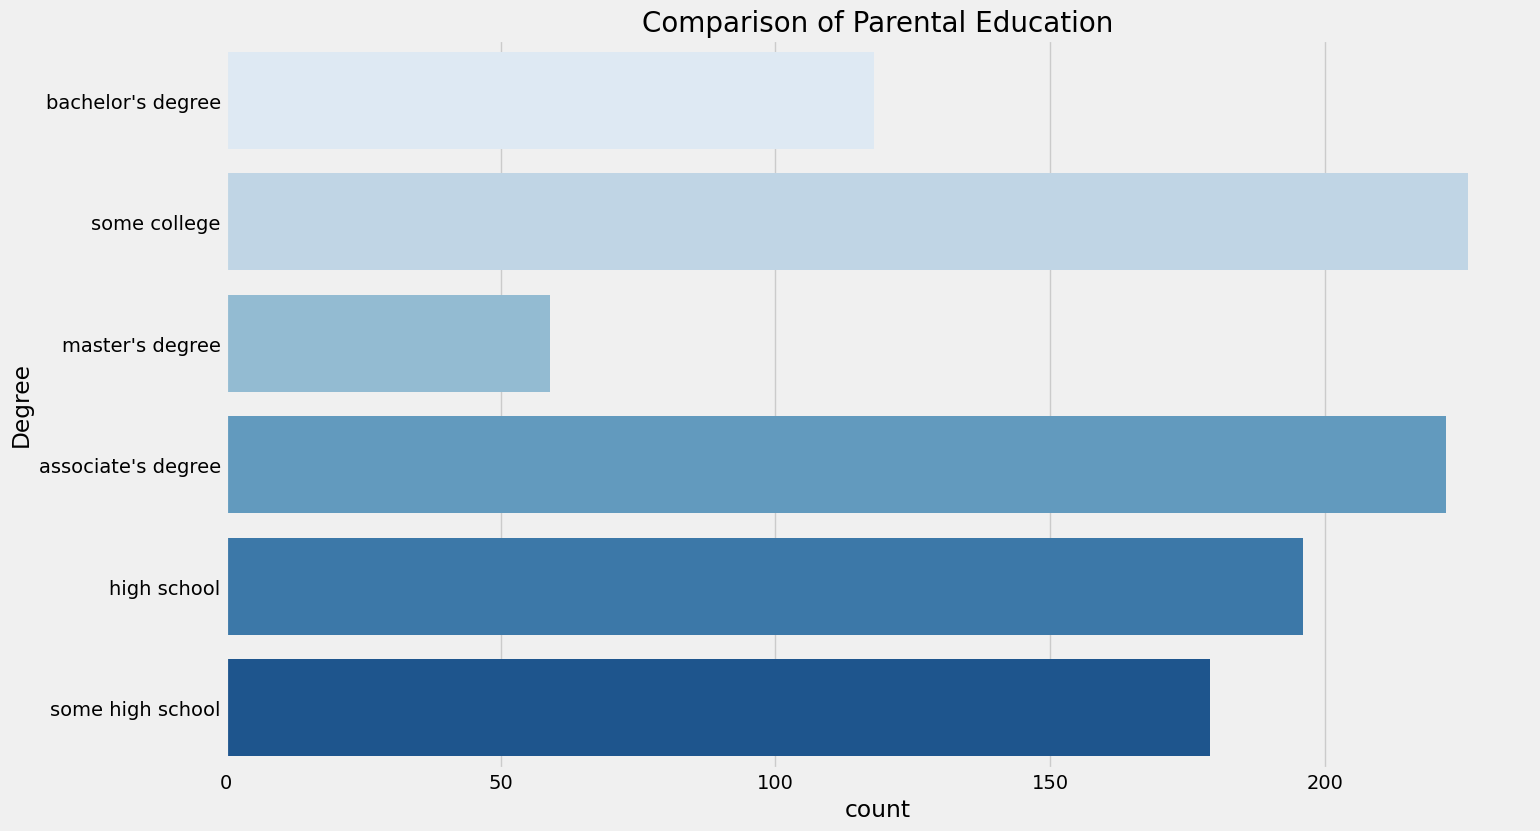

In [32]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('count')
plt.ylabel('Degree')
plt.show()

#### Insights
  * Largest number of parental education are some college

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

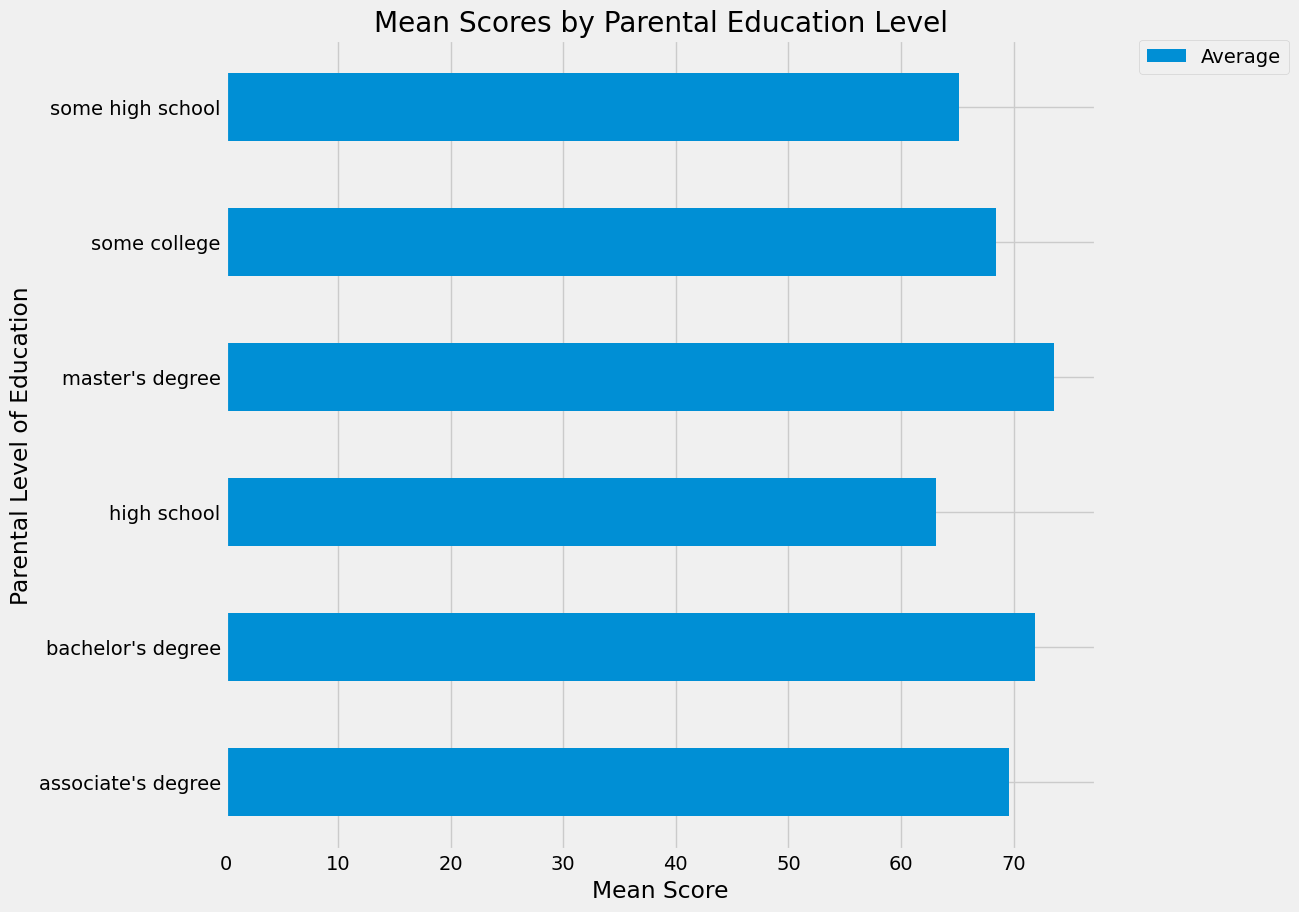

In [36]:
# Group by 'parental_level_of_education' and compute the mean
mean_scores = df.groupby('parental_level_of_education')['Average'].mean()

# Create a horizontal bar plot
plt.figure(figsize = (10, 10))
mean_scores.plot(kind = 'barh')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad = 0.)
plt.xlabel('Mean Score')
plt.ylabel('Parental Level of Education')
plt.title('Mean Scores by Parental Education Level')
plt.show()


#### Insights
  * The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN
  * Which type of lunch is most common amoung students ?
  * What is the effect of lunch type on test results?

### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

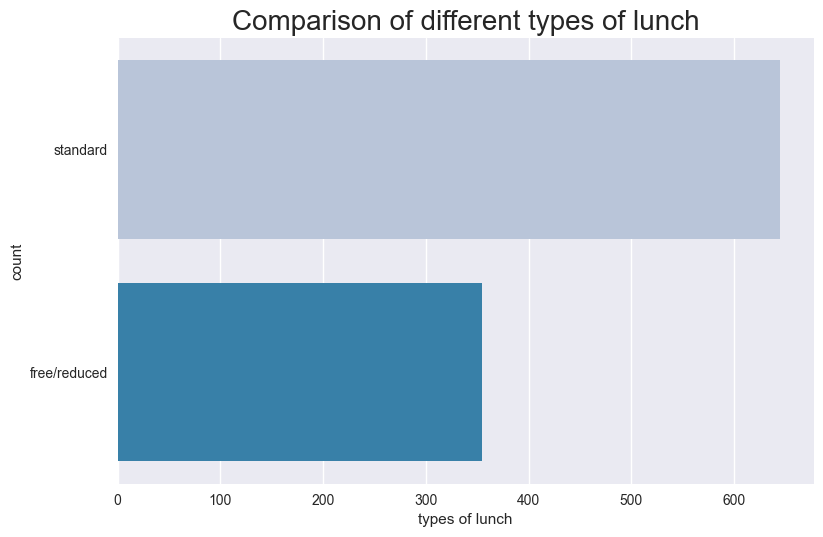

In [38]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insight
  * Students being served Standard lunch was more than free lunch

### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

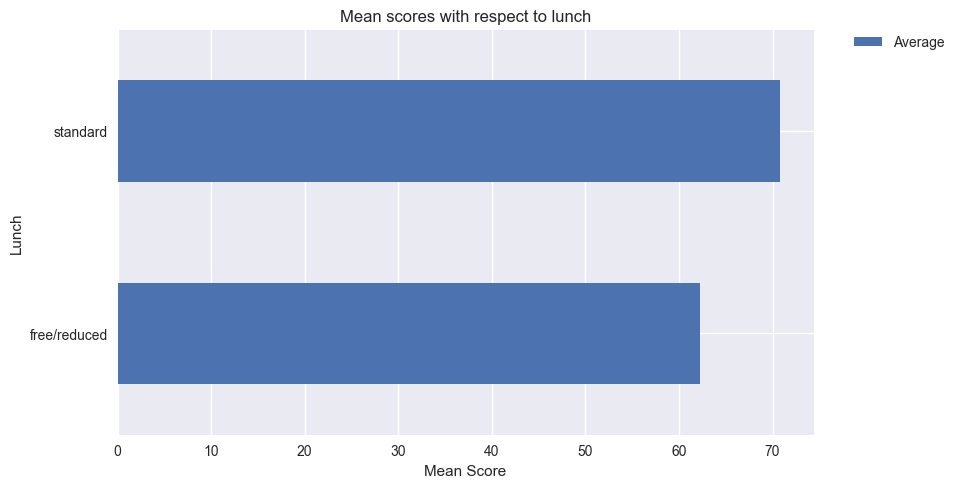

In [43]:
mean_scores = df.groupby('lunch')['Average'].mean()

# Create a horizontal bar plot
plt.figure(figsize = (8, 5))
mean_scores.plot(kind = 'barh')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad = 0.)
plt.xlabel('Mean Score')
plt.ylabel('Lunch')
plt.title('Mean scores with respect to lunch')
plt.show()

#### Insight
 * Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN
 * Which type of lunch is most common amoung students ?
 * Is Test prepration course has any impact on student's performance ?

### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

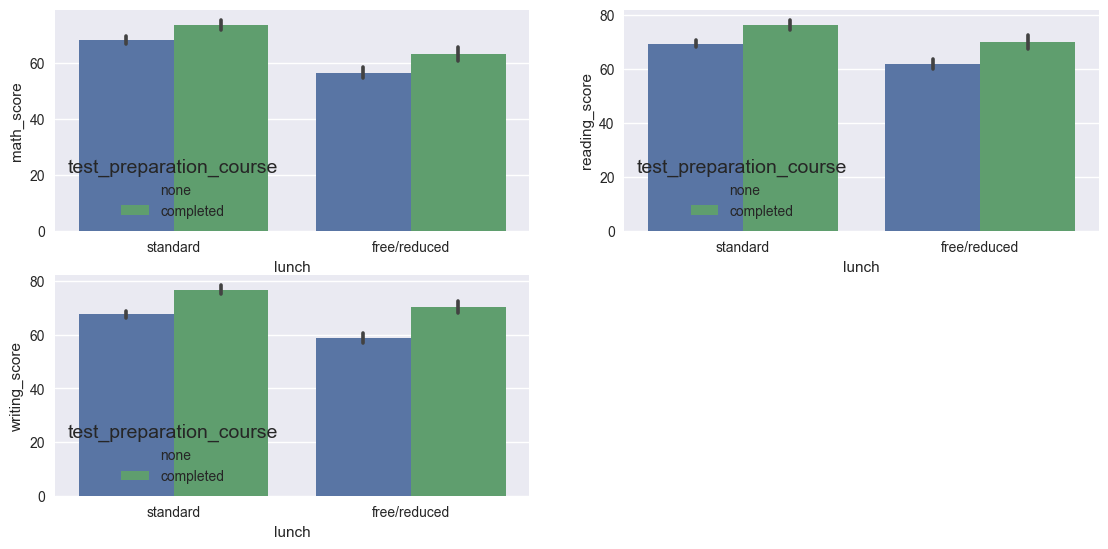

In [44]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.barplot (x = df['lunch'], y = df['math_score'], hue = df['test_preparation_course'])
plt.subplot(2, 2, 2)
sns.barplot (x = df['lunch'], y = df['reading_score'], hue = df['test_preparation_course'])
plt.subplot(2, 2, 3)
sns.barplot (x = df['lunch'], y = df['writing_score'], hue = df['test_preparation_course'])

#### Insight
* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

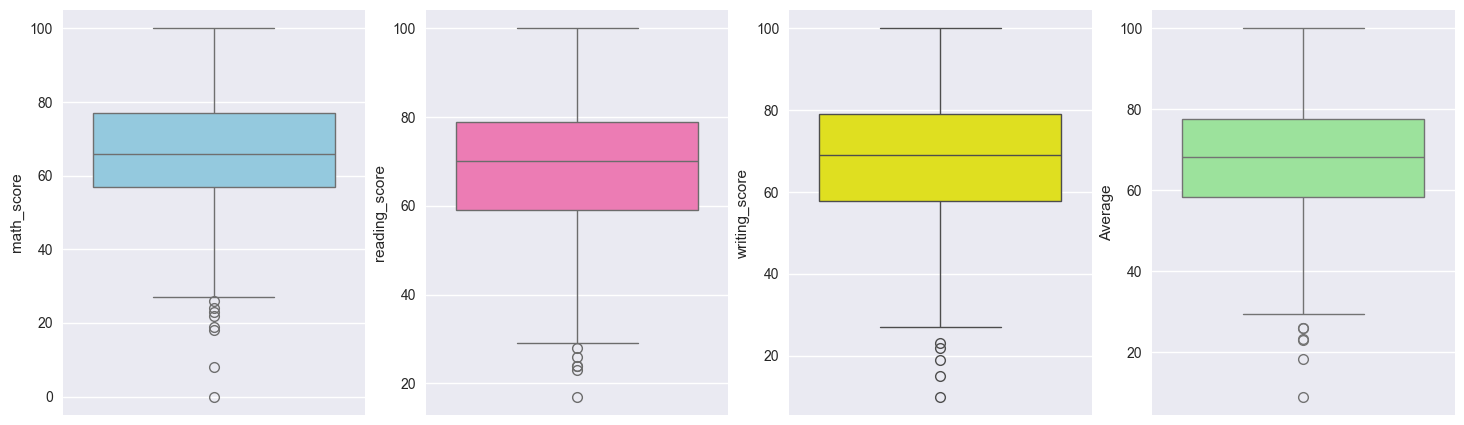

In [46]:
plt.subplots(1, 4, figsize = (16, 5))
plt.subplot(141)
sns.boxplot(df['math_score'], color = 'skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'], color = 'hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'], color = 'yellow')
plt.subplot(144)
sns.boxplot(df['Average'], color = 'lightgreen')
plt.show()


#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

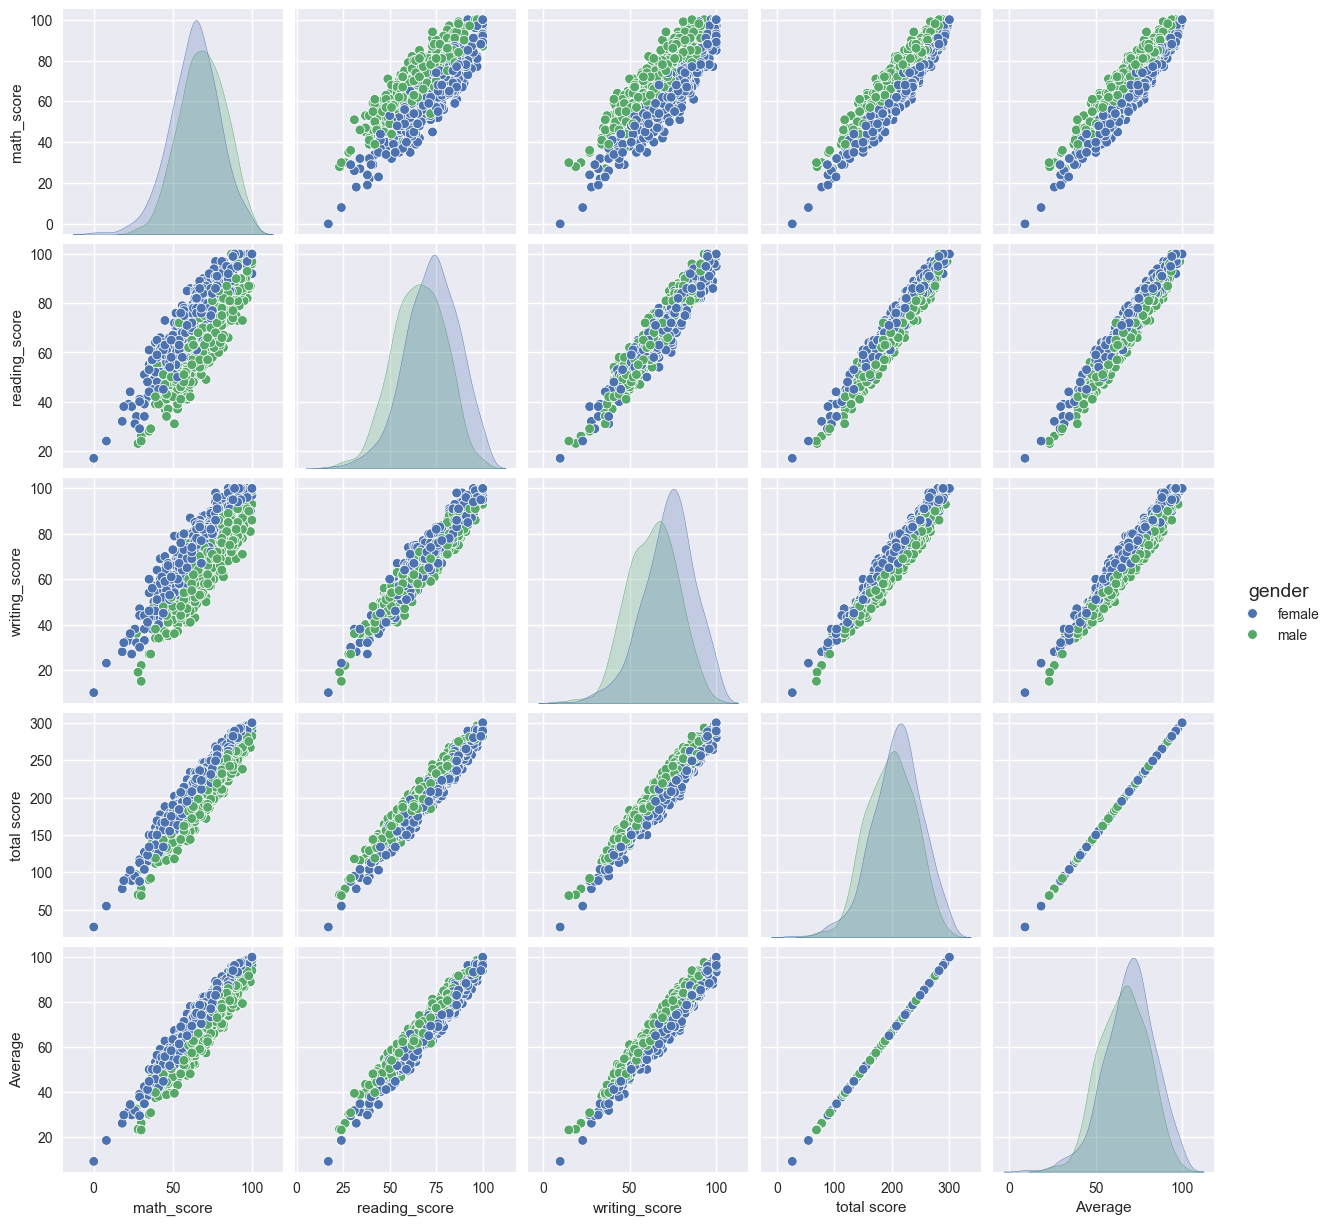

In [47]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insight
  * From the above plot it is clear that all the scores increase linearly with each other.

### 5.Conclusion

* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.